In [14]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorly as tl
import numpy as np
import pickle
from copy import deepcopy
import seaborn as sns

import plot_funcs
from plot_funcs import *

from tensorly.metrics import congruence_coefficient

In [15]:
COL_PT  = 235.25
TEXT_PT = 488.5
PT_PER_IN = 72.27

COL_IN  = COL_PT  / PT_PER_IN   # 3.2551542826 in
TEXT_IN = TEXT_PT / PT_PER_IN   # 6.7593745676 in

# Choose an aspect ratio (pick one and standardize it across the paper)
H_COL_IN  = 0.62 * COL_IN       # 2.0181956552 in  (good default)
H_TEXT_IN = 0.35 * TEXT_IN      # 2.3657810987 in  (common for wide figs)

import matplotlib as mpl

rc = {
    # ---- LaTeX-driven text (font family will match your document) ----
    "text.usetex": False,

    # ---- exact sizes (pt) to match your template ----
    "font.size": 7.52812,        # normalsize
    "axes.labelsize": 7.52812,
    "axes.titlesize": 7.52812,
    "xtick.labelsize": 6.5,      # scriptsize
    "ytick.labelsize": 6.5,
    "legend.fontsize": 6.5,

    # ---- figure geometry (set per-figure; keep here as a default) ----
    "figure.figsize": (3.2551542826, 2.0181956552),  # (COL_IN, 0.62*COL_IN)

    # ---- line/tick aesthetics that survive 2-col printing ----
    "axes.linewidth": 0.8,
    "lines.linewidth": 0.9,
    "xtick.major.width": 0.8,
    "ytick.major.width": 0.8,
    "xtick.minor.width": 0.6,
    "ytick.minor.width": 0.6,
    "xtick.major.size": 3.0,
    "ytick.major.size": 3.0,
    "xtick.minor.size": 1.6,
    "ytick.minor.size": 1.6,

    # ---- legend/spacing ----
    "legend.frameon": False,

    # ---- saving: keep final size exact (avoid bbox_inches='tight') ----
    "savefig.format": "pdf",
    "savefig.bbox": "standard",
    "savefig.pad_inches": 0.0,
}
mpl.rcParams.update(rc)

# Metabolomics

In [16]:
# bmi = sio.loadmat("Metabolomics/Meta.mat",simplify_cells=True)['Meta']['class'][0][0][1]
# homair = sio.loadmat("Metabolomics/Meta.mat",simplify_cells=True)['Meta']['data'][:,10]
# bmi_full = sio.loadmat("Metabolomics/Meta.mat",simplify_cells=True)['Meta']['data'][:,25]
bmi = sio.loadmat("Metabolomics/Meta_females.mat",simplify_cells=True)['Meta']['class'][0][0][1]
homair = sio.loadmat("Metabolomics/Meta_females.mat",simplify_cells=True)['Meta']['data'][:,10]
bmi_full = sio.loadmat("Metabolomics/Meta_females.mat",simplify_cells=True)['Meta']['data'][:,25]

metabolites = sio.loadmat('Z_females.mat',simplify_cells=True)['Xfinal']['label'][2][0][0]
metabolites = [m.strip() for m in metabolites]

metabolite_class = sio.loadmat('Z_females.mat',simplify_cells=True)['Xfinal']['label'][2][0][1]
metabolite_class = [m.strip() for m in metabolite_class]
print(metabolite_class)

# find indices where metabolite_class is 'Ketone bodies'
ketone_indices = [i for i, x in enumerate(metabolite_class) if x == 'Ketone bodies']
ketone_metabolites = [metabolites[i] for i in ketone_indices]
print("Ketone bodies metabolites:", ketone_metabolites)

glycolisis = [i for i, x in enumerate(metabolite_class) if x == 'Glycolysis related metabolites']
glycolisis_metabolites = [metabolites[i] for i in glycolisis]
print("Glycolysis related metabolites:", glycolisis_metabolites)

['Cholesterol', 'Cholesterol', 'Cholesterol', 'Cholesterol', 'Cholesterol', 'Triglycerides', 'Triglycerides', 'Triglycerides', 'Triglycerides', 'Phospholipids', 'Phospholipids', 'Phospholipids', 'Phospholipids', 'Cholesteryl esters', 'Cholesteryl esters', 'Cholesteryl esters', 'Cholesteryl esters', 'Free cholesterol', 'Free cholesterol', 'Free cholesterol', 'Free cholesterol', 'Total lipids', 'Total lipids', 'Total lipids', 'Total lipids', 'Lipoprotein particle concentrations', 'Lipoprotein particle concentrations', 'Lipoprotein particle concentrations', 'Lipoprotein particle concentrations', 'Lipoprotein particle sizes', 'Lipoprotein particle sizes', 'Lipoprotein particle sizes', 'Apolipoproteins', 'Apolipoproteins', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Fatty acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'Amino acids', 'G

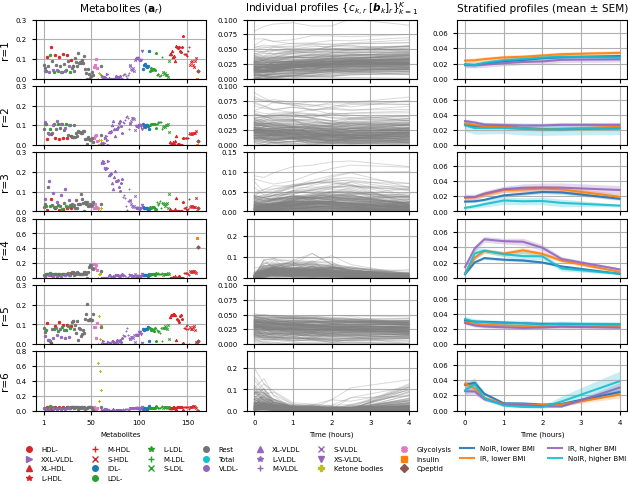

In [17]:
model = 'cmf'
n_components = 6
l_B = 0.0

with open(f'Metabolomics/results/uniqueness/factors_{model}_{n_components}_components_l_B_{l_B}_females.pkl', 'rb') as f:
    results = pickle.load(f)

A = results[0][0][2]
C = results[0][0][0]
if model != 'cp':
    B = results[0][0][1]
else:
    B = [deepcopy(results[0][0][1]) for _ in range(A.shape[0])]

TEXT_IN = 6.7593745676

fig, axs = plt.subplots(
    6, 3,
    figsize=(TEXT_IN, 0.65 * TEXT_IN),   # <-- WIDTH FIXED, ONLY HEIGHT CHANGES
    constrained_layout=False
)

# Control spacing explicitly (recommended for dense grids)
fig.subplots_adjust(
    left=0.06, right=0.935, bottom=0.08, top=0.97,
    wspace=0.24, hspace=0.12
)

# perm = [0,1,2,3,4,5]

# B = [b[:,perm] for b in B]

for i, comp in enumerate([5,3,1,4,0,2]):
    if i == 0: 
        plot_metabolite_component(factors=(A,B,C),comp=comp, metabolites=metabolites,axes=axs[i,0],plot_title=True,comp_i=i)
        plot_metabolomics_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,plot_title=True,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
        plot_metabolomics_stratified_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_title=True,homair=homair,bmi_full=bmi_full,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
    elif i == 5: 
        plot_metabolite_component(factors=(A,B,C),comp=comp,metabolites=metabolites,axes=axs[i,0],plot_xticks=True,plot_legend=True,comp_i=i)
        plot_metabolomics_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,plot_legend=True,plot_xticks=True,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
        plot_metabolomics_stratified_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_legend=True,plot_xticks=True,homair=homair,bmi_full=bmi_full,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
    else: 
        plot_metabolite_component(factors=(A,B,C),comp=comp,metabolites=metabolites,axes=axs[i,0],comp_i=i)
        plot_metabolomics_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])
        plot_metabolomics_stratified_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,2],homair=homair,bmi_full=bmi_full,time_points=[0,0.25,0.5,1,1.5,2,2.5,4])


axs[0,0].set_xticks([0,49,99,149])
axs[1,0].set_xticks([0,49,99,149])
axs[2,0].set_xticks([0,49,99,149])
axs[3,0].set_xticks([0,49,99,149])
axs[4,0].set_xticks([0,49,99,149])
axs[5,0].set_xticks([0,49,99,149])

axs[0,0].set_ylim([0,.3])
axs[1,0].set_ylim([0,.3])
axs[2,0].set_ylim([0,.3])
# axs[3,0].set_ylim([0,.3])
axs[4,0].set_ylim([0,.3])
# axs[5,0].set_ylim([0,.3])

axs[0,1].set_ylim([0,.10])
axs[1,1].set_ylim([0,.10])
axs[2,1].set_ylim([0,.15])
# axs[3,1].set_ylim([0,.10])
axs[4,1].set_ylim([0,.10])
# axs[5,1].set_ylim([0,.10])

plt.show()

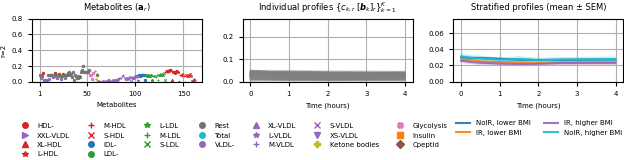

In [18]:
# Plot a single component of a model

model = 'parafac2'
n_components = 6
l_B = 0.0
gender = 'females'

with open(f'Metabolomics/results/uniqueness/factors_{model}_{n_components}_components_l_B_{l_B}_{gender}.pkl', 'rb') as f:
    results = pickle.load(f)

A = results[0][0][2]
C = results[0][0][0]
if model != 'cp':
    B = results[0][0][1]
else:
    B = [deepcopy(results[0][0][1]) for _ in range(A.shape[0])]
    (A,B,C) = (C,B,A)

TEXT_IN = 6.7593745676

fig, axs = plt.subplots(
    1, 3,
    figsize=(TEXT_IN, 0.105 * TEXT_IN),   # <-- WIDTH FIXED, ONLY HEIGHT CHANGES
    constrained_layout=False
)
fig.subplots_adjust(
    left=0.06, right=0.935, bottom=0.08, top=0.97,
    wspace=0.24, hspace=0.12
)

# r = 0 #5

comp_i = 1

plot_metabolite_component(factors=(A,B,C),comp=comp_i, metabolites=metabolites,axes=axs[0],plot_title=True,comp_i=comp_i,plot_legend=True,plot_xticks=True)
plot_metabolomics_profile_component(factors=(A,B,C),comp=comp_i,axes=axs[1],comp_i=comp_i,plot_title=True,time_points=[0,0.25,0.5,1,1.5,2,2.5,4],plot_legend=True,plot_xticks=True)
plot_metabolomics_stratified_profiles_component(factors=(A,B,C),comp=comp_i,axes=axs[2],plot_title=True,homair=homair,bmi_full=bmi_full,time_points=[0,0.25,0.5,1,1.5,2,2.5,4],plot_legend=True,plot_xticks=True)

for ax in fig.axes:
    # Tick labels
    ax.tick_params(axis="both", which="both", labelsize=5)

    # Axes title + axis labels
    ax.title.set_fontsize(6)
    ax.xaxis.label.set_fontsize(5)
    ax.yaxis.label.set_fontsize(5)

    # Legend (if present)
    leg = ax.get_legend()
    if leg is not None:
        for t in leg.get_texts():
            t.set_fontsize(5)
        # if leg.get_title() is not None:
        #     leg.get_title().set_fontsize(5)

# fig.savefig(f"[MET]grid_1x3_{model}.pdf", bbox_inches="tight")  # no bbox_inches="tight"

/tmp/ipykernel_26207/3065798417.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([2,3,4,5,6,7,8]*3, fontsize=5)
/tmp/ipykernel_26207/3065798417.py:135: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([2,3,4,5,6,7,8]*3, fontsize=5)


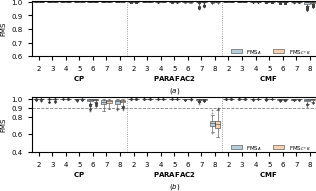

In [19]:
# Reproducibility/replicability plot
# Requires the following files:
# - Metabolomics/df_A_uniq_{gender}.pkl
# - Metabolomics/df_CB_uniq_{gender}.pkl
# - Metabolomics/df_A_replic_{gender}.pkl
# - Metabolomics/df_CB_replic_{gender}.pkl
# which are aobtained after runing uniqueness_analysis_metabolomics.ipynb and replicability_analysis.ipynb.

gender = 'males'

box_kws = dict(
    width=0.8,          # thinner boxes (try 0.35–0.50)
    linewidth=0.6,       # thinner outlines
    showfliers=True,
    fliersize=0.8,       # smaller outliers (points)

    # More explicit control (overrides defaults)
    flierprops=dict(
        marker='o',
        markersize=0.8,
        markeredgewidth=0.4,
        alpha=0.7,
    ),
    boxprops=dict(linewidth=0.4),
    whiskerprops=dict(linewidth=0.4),
    capprops=dict(linewidth=0.4),
    medianprops=dict(linewidth=0.4),
)


fig, axs = plt.subplots(
    2, 1,
    figsize=(COL_IN, 0.62*COL_IN),   # EXACT same figure size as before
    # figsize=(8,4),
    sharex=False, sharey=False,      # change if you want shared scales
)

dfa = pd.read_pickle(f"Metabolomics/df_A_uniq_{gender}.pkl")
dfc = pd.read_pickle(f"Metabolomics/df_CB_uniq_{gender}.pkl")
df_long = pd.concat([dfa, dfc], ignore_index=True)

order =  ['cp_2_0.0', 'cp_3_0.0', 'cp_4_0.0', 'cp_5_0.0', 'cp_6_0.0','cp_7_0.0', 'cp_8_0.0',
    'parafac2_2_0.0', 'parafac2_3_0.0', 'parafac2_4_0.0', 'parafac2_5_0.0', 'parafac2_6_0.0', 'parafac2_7_0.0', 'parafac2_8_0.0',
             'cmf_2_0.0', 'cmf_3_0.0', 'cmf_4_0.0', 'cmf_5_0.0', 'cmf_6_0.0', 'cmf_7_0.0', 'cmf_8_0.0']
            # 'smoothcmf_2_0.01', 'smoothcmf_3_0.01', 'smoothcmf_4_0.01', 'smoothcmf_5_0.01', 'smoothcmf_6_0.01',]


df_long["metric"] = df_long["metric"].replace({"CB": "C*B"})
df_long["metric"] = df_long["metric"].replace({"C*B": r"$\text{FMS}_{C*B}$"})
df_long["metric"] = df_long["metric"].replace({"A": r"$\text{FMS}_{A}$"})

# # drop rows with model == 'parafac2' and rank == 6
# df_long = df_long[~((df_long['model'] == 'parafac2') & (df_long['r'] == 6))]

ax = sns.boxplot(
    data=df_long, x='label', y='value', hue='metric',
    ax=axs[0],order=order,**box_kws
)

# Make the boxes semi-transparent
for patch in ax.patches:  # PathPatches
    r, g, b, _ = mpl.colors.to_rgba(patch.get_facecolor())
    patch.set_facecolor((r, g, b, 0.35))

# Single legend (for metric)
handles, labels = ax.get_legend_handles_labels()
# first k handles/labels correspond to 'metric' from the first layer (boxplot)
k = df_long['metric'].nunique()  # should be 2
axs[0].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.25),ncols=2,fontsize=4)
axs[0].text(0.165, -0.4, r'$\bf{CP}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].text(0.5, -0.4, r'$\bf{PARAFAC2}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].text(0.83, -0.4, r'$\bf{CMF}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].axvline(x=6.5, color='tab:gray', linestyle=':',linewidth=0.6) # Metabolomics
axs[0].axvline(x=13.5, color='tab:gray', linestyle=':',linewidth=0.6) # Metabolomics
# axs[0].axvline(x=4.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization
# axs[0].axvline(x=9.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization

axs[0].set_xticklabels([2,3,4,5,6,7,8]*3, fontsize=5)
axs[0].set_xlabel('')
# axs[0].axhline(y=0.9, color='gray', linestyle='--',linewidth=0.6)
axs[0].set_ylim(0.8,1.005)
# axs[0].set_ylim(0.3,1.005) # Sensitizations
axs[0].set_ylabel('FMS',fontsize=5)
axs[0].set_yticks([0.6,0.7,0.8,0.9,1.0],labels=[0.6,0.7,0.8,0.9,1.0],fontsize=5)
# axs[0].set_yticks([0.75,0.8,0.85,0.9,0.95,1.0],labels=[0.75,0.8,0.85,0.9,0.95,1.0],fontsize=5)
# axs[0].grid(True)
# axs[0].set_title('Reproducibility results')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)
    spine.set_edgecolor("black")

dfa = pd.read_pickle(f"Metabolomics/df_A_replic_{gender}.pkl")
dfc = pd.read_pickle(f"Metabolomics/df_CB_replic_{gender}.pkl")
df_long = pd.concat([dfa, dfc], ignore_index=True)

order =  ['cp_2_0.0_10', 'cp_3_0.0_10', 'cp_4_0.0_10', 'cp_5_0.0_10', 'cp_6_0.0_10', 'cp_7_0.0_10', 'cp_8_0.0_10',
    'parafac2_2_0.0_10', 'parafac2_3_0.0_10', 'parafac2_4_0.0_10', 'parafac2_5_0.0_10', 'parafac2_6_0.0_10', 'parafac2_7_0.0_10', 'parafac2_8_0.0_10',
             'cmf_2_0.0_10', 'cmf_3_0.0_10', 'cmf_4_0.0_10', 'cmf_5_0.0_10', 'cmf_6_0.0_10', 'cmf_7_0.0_10', 'cmf_8_0.0_10']
            # 'smoothcmf_2_0.01_10', 'smoothcmf_3_0.01_10', 'smoothcmf_4_0.01_10', 'smoothcmf_5_0.01_10', 'smoothcmf_6_0.01_10',]

df_long["metric"] = df_long["metric"].replace({"CB": "C*B"})
df_long["metric"] = df_long["metric"].replace({"C*B": r"$\text{FMS}_{C*B}$"})
df_long["metric"] = df_long["metric"].replace({"A": r"$\text{FMS}_{A}$"})

# drop rows with model == 'parafac2' and rank == 6
# df_long = df_long[~((df_long['model'] == 'parafac2') & (df_long['r'] == 6))]
 
ax = sns.boxplot(
    data=df_long, x='label', y='value', hue='metric',
    ax=axs[1],order=order,**box_kws
)

# Make the boxes semi-transparent
for patch in ax.patches:  # PathPatches
    r, g, b, _ = mpl.colors.to_rgba(patch.get_facecolor())
    patch.set_facecolor((r, g, b, 0.35))

# Single legend (for metric)
handles, labels = ax.get_legend_handles_labels()
# first k handles/labels correspond to 'metric' from the first layer (boxplot)
k = df_long['metric'].nunique()  # should be 2
axs[1].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.25),ncols=2,fontsize=4) # metabolomics
# axs[1].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.18),ncols=2,fontsize=4) #sensitizations
axs[1].text(0.165, -0.4, r'$\bf{CP}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].text(0.5, -0.4, r'$\bf{PARAFAC2}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].text(0.83, -0.4, r'$\bf{CMF}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
# axs[1].axvline(x=4.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization
# axs[1].axvline(x=9.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization
axs[1].axvline(x=6.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # metabolomics
axs[1].axvline(x=13.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # metabolomics
# axs[1].text(0.5, -0.3, r'$\bf{(a)}$', fontsize=5)

axs[1].set_xticklabels([2,3,4,5,6,7,8]*3, fontsize=5)
axs[1].axhline(y=0.9, color='gray', linestyle='--',linewidth=0.6,zorder=0)
# axs[1].set_ylim(0.5,1.005) # Metabolomics
# axs[1].set_ylim(0.8,1.005) # Sensitizations
axs[1].set_yticks([0.4,0.6,0.8,0.9,1.0],labels=[0.4,0.6,0.8,0.9,1.0],fontsize=5)
axs[1].set_ylabel('FMS',fontsize=5)
axs[1].set_xlabel('')
# axs[1].text(0.5, -0.2, '(b)',fontsize=5)
# axs[1].grid(True)
# axs[1].set_title('Replicability results')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)
    spine.set_edgecolor("black")

axs[0].text(
    0.5, -0.62, r'$(a)$',
    ha='center', va='center',
    transform=axs[0].transAxes,
    fontsize=5,
    clip_on=False
)

# ---- subplot (b) label (below the second plot) ----
axs[1].text(
    0.5, -0.62, r'$(b)$',
    ha='center', va='center',
    transform=axs[1].transAxes,
    fontsize=5,
    clip_on=False
)

for ax in (axs[0], axs[1]):
    ax.tick_params(axis="both", labelsize=5)

# axs[1].legend(handles[:k], labels[:k], bbox_to_anchor=(0.766, 0.25),ncols=2,fontsize=4) #sensitizations

fig.tight_layout(pad=0.02)  # OK: does NOT change figure size
fig.subplots_adjust(wspace=0.8, hspace=0.75,top=0.99,right=0.99,left=0.115)
# fig.savefig("[MET]repr_replic_females.pdf", pad_inches=0.03,bbox_inches="tight",dpi=600)      # no bbox_inches="tight" if you want exact size

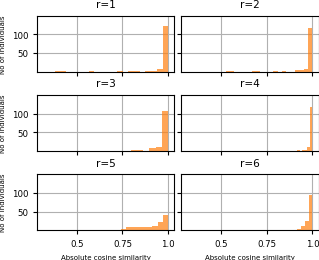

In [20]:
# Compare profiles between CMF and PARAFAC2

gender = 'males'

tol = 1e-4
no_of_components = 6
l_B = 0.0
comp2match = 0

fmss_per_comp = {0: [],1: [],2: [], 3: [], 4:[],5:[]}

with open(f'Metabolomics/results/uniqueness/factors_cmf_{no_of_components}_components_l_B_{l_B}_{gender}.pkl', 'rb') as f:
    results_cmf = pickle.load(f)

(A1,B1,D1) = results_cmf[0][0]

with open(f'Metabolomics/results/uniqueness/factors_parafac2_{no_of_components}_components_l_B_{l_B}_{gender}.pkl', 'rb') as f:
    results_parafac2 = pickle.load(f)

(A2,B2,D2) = results_parafac2[0][0]

A1, B1, D1 = get_profiles_factors((D1,B1,A1))
A2, B2, D2 = get_profiles_factors((D2,B2,A2))

B1 = [b[:,[5,3,1,4,0,2]] for b in B1]

B1_bar = np.vstack(B1)
B2_bar = np.vstack(B2)

perm = congruence_coefficient(B1_bar,B2_bar)[1]

for k in range(len(B1)): # for each subject
    for r in range(B1[0].shape[1]): # for each component
        fmss_per_comp[r].append(congruence_coefficient(B1[k][:,r].reshape(-1,1),B2[k][:,perm[r]].reshape(-1,1))[0])


fig, axs = plt.subplots(
    3, 2,
    figsize=(COL_IN, 0.75*COL_IN),   # EXACT same figure size as before
    # figsize=(8,4),
    sharex=True, sharey=False,      # change if you want shared scales
)

for ax in axs.flatten():
    ax.set_axisbelow(True)          # grid/ticks behind artists
    ax.grid(True, zorder=0)         # optional explicit zorder
    ax.set_ylim([0,150])
    ax.set_yticks([50,100],labels=[50,100],fontsize=6.25)
    ax.set_xticks([0,0.25,0.5,0.75,1.0],[0,0.25,0.5,0.75,1.0],fontsize=6.25)

axs[0,0].hist(fmss_per_comp[0],color='tab:orange',alpha=0.7,bins=20)
axs[0,0].set_title(f'r={1}')
axs[0,0].set_ylabel('No of individuals',fontsize=5)

axs[0,1].hist(fmss_per_comp[1],color='tab:orange',alpha=0.7,bins=20)
axs[0,1].set_title(f'r={2}')
axs[0,1].set_yticklabels([])

axs[1,0].hist(fmss_per_comp[2],color='tab:orange',alpha=0.7,bins=20)
axs[1,0].set_title(f'r={3}')
axs[1,0].set_ylabel('No of individuals',fontsize=5)

axs[1,1].hist(fmss_per_comp[3],color='tab:orange',alpha=0.7,bins=20)
axs[1,1].set_title(f'r={4}')
axs[1,1].set_yticklabels([])

axs[2,0].hist(fmss_per_comp[4],color='tab:orange',alpha=0.7,bins=20)
axs[2,0].set_title(f'r={5}')
axs[2,0].set_ylabel('No of individuals',fontsize=5)
axs[2,0].set_xlabel(r'Absolute cosine similarity',fontsize=5)

axs[2,1].hist(fmss_per_comp[5],color='tab:orange',alpha=0.7,bins=20)
axs[2,1].set_title(f'r={6}')
axs[2,1].set_yticklabels([])
axs[2,1].set_xlabel(r'Absolute cosine similarity',fontsize=5)

# axs[0,0].set_ylabel('Number of\n individuals',fontsize=5,ha='center')

# fig.tight_layout(pad=0.02)  # OK: does NOT change figure size
fig.subplots_adjust(wspace=0.05, hspace=0.415,top=0.99,right=0.98,left=0.115)
# fig.savefig("[MET]profile_comparison.pdf", pad_inches=0.03,bbox_inches="tight",dpi=600)      # no bbox_inches="tight" if you want exact size

# Sensitization

In [22]:
# df = pd.read_csv('Sensitization/metadata_full.csv')
df = pd.read_csv('Sensitization/metadata.csv')

meta = df['Delivery(Natural(1)/C-section(2)/Vacuum(3))'].to_numpy()

allergens = ['Mugwort','Birch','Molds','Timothy grass','Wheat flour', 'Milk','Peanut','Egg','Dog','Cat','D.pteronyssinus']

allergens.reverse()

(0.0, 0.4)

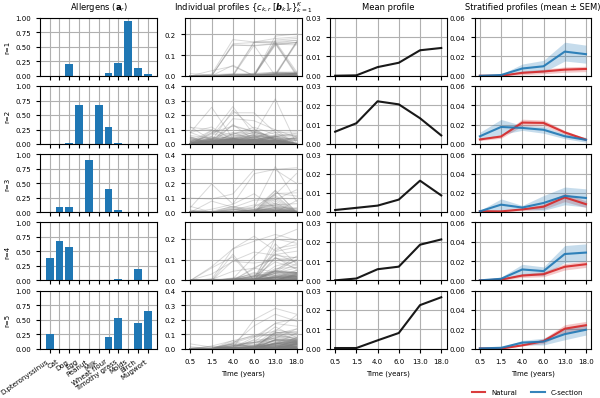

In [23]:
model = 'cmf'
n_components = 5
l_B = 0.0

with open(f'Sensitization/results/uniqueness/factors_{model}_{n_components}_components_l_B_{l_B}.pkl', 'rb') as f:
    results = pickle.load(f)

A = results[0][0][2]
C = results[0][0][0]
if model != 'cp':
    B = results[0][0][1]
else:
    B = [deepcopy(results[0][0][1]) for _ in range(C.shape[0])]

TEXT_IN = 6.7593745676

fig, axs = plt.subplots(
    5, 4,
    figsize=(TEXT_IN, 0.55 * TEXT_IN),   # <-- WIDTH FIXED, ONLY HEIGHT CHANGES
    constrained_layout=False
)

# Control spacing explicitly (recommended for dense grids)
fig.subplots_adjust(
    left=0.06, right=0.875, bottom=0.08, top=0.97,
    wspace=0.24, hspace=0.175
)

# plot_mask = [0,2,1,3,4]

for i, comp in enumerate([3,0,2,1,4]):#enumerate(range(5)):
    if i == 0: 
        plot_allergens_component(factors=(A,B,C),comp=comp, allergens=allergens, axes=axs[i,0],plot_title=True,comp_i=i)
        plot_sensitization_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,plot_title=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_mean_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_title=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_profiles_stratified_component(factors=(A,B,C),comp=comp,axes=axs[i,3],meta=meta,plot_title=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
    elif i == 4: 
        plot_allergens_component(factors=(A,B,C),comp=comp,allergens=allergens,axes=axs[i,0],plot_xticks=True,plot_legend=True,comp_i=i)
        plot_sensitization_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,plot_legend=True,plot_xticks=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_mean_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_legend=True,plot_xticks=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_profiles_stratified_component(factors=(A,B,C),meta=meta,comp=comp,axes=axs[i,3],plot_legend=True,plot_xticks=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
    else: 
        plot_allergens_component(factors=(A,B,C),comp=comp,allergens=allergens,axes=axs[i,0],comp_i=i)
        plot_sensitization_profiles_component(factors=(A,B,C),comp=comp,axes=axs[i,1],comp_i=i,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_mean_profile_component(factors=(A,B,C),comp=comp,axes=axs[i,2],plot_legend=True,plot_xticks=True,time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
        plot_sensitization_profiles_stratified_component(factors=(A,B,C),meta=meta,comp=comp,axes=axs[i,3],time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])

for ax in fig.axes:
    # Tick labels
    ax.tick_params(axis="both", which="both", labelsize=5)

    # Axes title + axis labels
    ax.title.set_fontsize(6)
    ax.xaxis.label.set_fontsize(5)
    ax.yaxis.label.set_fontsize(5)

    # Legend (if present)
    leg = ax.get_legend()
    if leg is not None:
        for t in leg.get_texts():
            t.set_fontsize(5)
        if leg.get_title() is not None:
            leg.get_title().set_fontsize(5)


axs[0,2].set_xticklabels([])
axs[1,2].set_xticklabels([])
axs[2,2].set_xticklabels([])
axs[3,2].set_xticklabels([])

axs[1,1].set_ylim([0,0.4])
axs[2,1].set_ylim([0,0.4])
axs[4,1].set_ylim([0,0.4])

# axs[0,1].set_ylim([0,0.3])
# axs[1,1].set_ylim([0,0.4])
# axs[1,2].set_ylim([0,0.4])
# axs[2,1].set_ylim([0,0.35])
# axs[2,2].set_ylim([0,0.04])
# axs[4,1].set_ylim([0,0.4])

# fig.savefig(f"[SENS]grid_5x3_{model}.pdf", bbox_inches="tight")

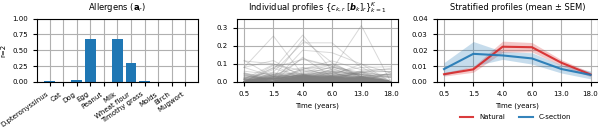

In [25]:
model = 'cmf'
n_components = 5
l_B = 0.0

with open(f'Sensitization/results/uniqueness/factors_{model}_{n_components}_components_l_B_{l_B}.pkl', 'rb') as f:
    results = pickle.load(f)

A = results[0][0][2]
C = results[0][0][0]
if model != 'cp':
    B = results[0][0][1]
else:
    B = [deepcopy(results[0][0][1]) for _ in range(C.shape[0])]

TEXT_IN = 6.7593745676

fig, axs = plt.subplots(
    1, 3,
    figsize=(TEXT_IN, 0.105 * TEXT_IN),   # <-- WIDTH FIXED, ONLY HEIGHT CHANGES
    constrained_layout=False
)
fig.subplots_adjust(
    left=0.06, right=0.890, bottom=0.08, top=0.97,
    wspace=0.24, hspace=0.12
)

comp = 0 #2
plot_allergens_component(factors=(A,B,C),axes=axs[0],comp=comp,allergens=allergens,plot_legend=True,plot_title=True,plot_xticks=True,comp_i=1)
plot_sensitization_profiles_component(factors=(A,B,C),comp=comp,comp_i=comp,plot_legend=True,plot_title=True,plot_xticks=True,axes=axs[1],time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
# plot_sensitization_mean_profile_component(factors=(A,B,C),comp=comp,plot_legend=True,plot_title=True,plot_xticks=True,axes=axs[2],time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ])
plot_sensitization_profiles_stratified_component(factors=(A,B,C),comp=comp,plot_legend=True,plot_title=True,plot_xticks=True,axes=axs[2],time_points=[ 0.5,  1.5,  4. ,  6. , 13. , 18. ],meta=meta)

for ax in fig.axes:
    # Tick labels
    ax.tick_params(axis="both", which="both", labelsize=5)

    # Axes title + axis labels
    ax.title.set_fontsize(6)
    ax.xaxis.label.set_fontsize(5)
    ax.yaxis.label.set_fontsize(5)

    # Legend (if present)
    leg = ax.get_legend()
    if leg is not None:
        for t in leg.get_texts():
            t.set_fontsize(5)
        if leg.get_title() is not None:
            leg.get_title().set_fontsize(5)

axs[2].set_ylim([0,0.04])
axs[1].set_ylim([0,0.35])
axs[2].legend(loc=[.125,-0.65],ncols=2,fontsize=5)

plt.show()

# fig.savefig(f"[SENS]grid_1x3_{model}.pdf", bbox_inches="tight")  # no bbox_inches="tight"

(176, 5) 176 (6, 5) (11, 5)


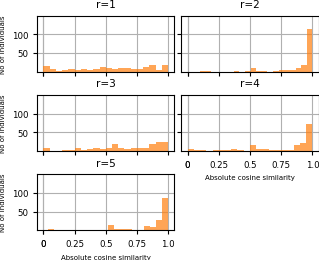

In [26]:
tol = 1e-4
no_of_components = 5
l_B = 0.0
comp2match = 0

fmss_per_comp = {0: [],1: [],2: [], 3: [], 4:[]}

with open(f'Sensitization/results/uniqueness/factors_cmf_{no_of_components}_components_l_B_{l_B}.pkl', 'rb') as f:
    results_cmf = pickle.load(f)

(A1,B1,D1) = results_cmf[0][0]

with open(f'Sensitization/results/uniqueness/factors_parafac2_{no_of_components}_components_l_B_{l_B}.pkl', 'rb') as f:
    results_parafac2 = pickle.load(f)

(A2,B2,D2) = results_parafac2[0][0]

print(A2.shape,len(B2),B2[0].shape,D2.shape)

A1, B1, D1 = get_profiles_factors((D1,B1,A1))
A2, B2, D2 = get_profiles_factors((D2,B2,A2))

B1 = [b[:,[3,0,2,1,4]] for b in B1]

B1_bar = np.vstack(B1)
B2_bar = np.vstack(B2)

perm = congruence_coefficient(B1_bar,B2_bar)[1]

for k in range(len(B1)): # for each subject
    for r in range(B1[0].shape[1]): # for each component
        fmss_per_comp[r].append(congruence_coefficient(B1[k][:,r].reshape(-1,1),B2[k][:,perm[r]].reshape(-1,1))[0])


fig, axs = plt.subplots(
    3, 2,
    figsize=(COL_IN, 0.75*COL_IN),   # EXACT same figure size as before
    # figsize=(8,4),
    sharex=True, sharey=False,      # change if you want shared scales
)

for ax in axs.flatten():
    ax.set_axisbelow(True)          # grid/ticks behind artists
    ax.grid(True, zorder=0)         # optional explicit zorder
    ax.set_ylim([0,150])
    ax.set_yticks([50,100],labels=[50,100],fontsize=6.25)
    ax.set_xticks([0,0,0.25,0.5,0.75,1.0],[0,0,0.25,0.5,0.75,1.0],fontsize=6.25)


# [0,2,1,3,4]

axs[0,0].hist(fmss_per_comp[0],color='tab:orange',alpha=0.7,bins=20)
axs[0,0].set_title(f'r={1}')
axs[0,0].set_ylabel('No of individuals',fontsize=5)

axs[0,1].hist(fmss_per_comp[1],color='tab:orange',alpha=0.7,bins=20)
axs[0,1].set_title(f'r={2}')
axs[0,1].set_yticklabels([])

axs[1,0].hist(fmss_per_comp[2],color='tab:orange',alpha=0.7,bins=20)
axs[1,0].set_title(f'r={3}')
axs[1,0].set_ylabel('No of individuals',fontsize=5)

axs[1,1].hist(fmss_per_comp[3],color='tab:orange',alpha=0.7,bins=20)
axs[1,1].set_title(f'r={4}')
axs[1,1].set_yticklabels([])

axs[2,0].hist(fmss_per_comp[4],color='tab:orange',alpha=0.7,bins=20)
axs[2,0].set_title(f'r={5}')
axs[2,0].set_ylabel('No of individuals',fontsize=5)
axs[2,0].set_xlabel(r'Absolute cosine similarity',fontsize=5)

# axs[2,1].hist(fmss_per_comp[2],color='tab:orange',alpha=0.7,bins=30)
# axs[2,1].set_title(f'r={6}')
# axs[2,1].set_yticklabels([])
# axs[2,1].set_xlabel(r'$FMS_{C*B}$',fontsize=5)

# axs[0,0].set_ylabel('Number of\n individuals',fontsize=5,ha='center')

axs[2,1].axis('off')
axs[1,1].set_xlabel(r'Absolute cosine similarity',fontsize=5)
axs[1,1].tick_params(axis='x', labelbottom=True, labelsize=6.25)  # <-- key

# fig.tight_layout(pad=0.02)  # OK: does NOT change figure size
fig.subplots_adjust(wspace=0.05, hspace=0.415,top=0.99,right=0.98,left=0.115)
# fig.savefig("[SENS]profile_comparison.pdf", pad_inches=0.03,bbox_inches="tight",dpi=600)      # no bbox_inches="tight" if you want exact size

/tmp/ipykernel_26207/3393228961.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([2,3,4,5,6]*3, fontsize=5)
/tmp/ipykernel_26207/3393228961.py:125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([2,3,4,5,6]*3, fontsize=5)


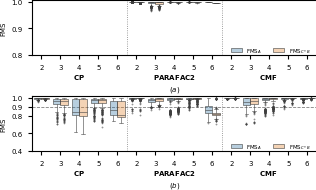

In [29]:


box_kws = dict(
    width=0.8,          # thinner boxes (try 0.35–0.50)
    linewidth=0.6,       # thinner outlines
    showfliers=True,
    fliersize=0.8,       # smaller outliers (points)

    # More explicit control (overrides defaults)
    flierprops=dict(
        marker='o',
        markersize=0.8,
        markeredgewidth=0.4,
        alpha=0.7,
    ),
    boxprops=dict(linewidth=0.4),
    whiskerprops=dict(linewidth=0.4),
    capprops=dict(linewidth=0.4),
    medianprops=dict(linewidth=0.4),
)


fig, axs = plt.subplots(
    2, 1,
    figsize=(COL_IN, 0.62*COL_IN),   # EXACT same figure size as before
    # figsize=(8,4),
    sharex=False, sharey=False,      # change if you want shared scales
)

dfa = pd.read_pickle(f"Sensitization/df_A_uniq.pkl")
dfc = pd.read_pickle(f"Sensitization/df_CB_uniq.pkl")
df_long = pd.concat([dfa, dfc], ignore_index=True)

order =  ['cp_2_0.0', 'cp_3_0.0', 'cp_4_0.0', 'cp_5_0.0', 'cp_6_0.0',#'cp_7_0.0', 'cp_8_0.0',
    'parafac2_2_0.0', 'parafac2_3_0.0', 'parafac2_4_0.0', 'parafac2_5_0.0', 'parafac2_6_0.0',# 'parafac2_7_0.0', 'parafac2_8_0.0',
             'cmf_2_0.0', 'cmf_3_0.0', 'cmf_4_0.0', 'cmf_5_0.0', 'cmf_6_0.0']#, 'cmf_7_0.0', 'cmf_8_0.0']
            # 'smoothcmf_2_0.01', 'smoothcmf_3_0.01', 'smoothcmf_4_0.01', 'smoothcmf_5_0.01', 'smoothcmf_6_0.01',]


df_long["metric"] = df_long["metric"].replace({"CB": "C*B"})
df_long["metric"] = df_long["metric"].replace({"C*B": r"$\text{FMS}_{C*B}$"})
df_long["metric"] = df_long["metric"].replace({"A": r"$\text{FMS}_{A}$"})

# # drop rows with model == 'parafac2' and rank == 6
# df_long = df_long[~((df_long['model'] == 'parafac2') & (df_long['r'] == 6))]

ax = sns.boxplot(
    data=df_long, x='label', y='value', hue='metric',
    ax=axs[0],order=order,**box_kws
)

# Make the boxes semi-transparent
for patch in ax.patches:  # PathPatches
    r, g, b, _ = mpl.colors.to_rgba(patch.get_facecolor())
    patch.set_facecolor((r, g, b, 0.35))

# Single legend (for metric)
handles, labels = ax.get_legend_handles_labels()
# first k handles/labels correspond to 'metric' from the first layer (boxplot)
k = df_long['metric'].nunique()  # should be 2
axs[0].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.25),ncols=2,fontsize=4)
axs[0].text(0.165, -0.4, r'$\bf{CP}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].text(0.5, -0.4, r'$\bf{PARAFAC2}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
axs[0].text(0.83, -0.4, r'$\bf{CMF}$', ha='center', va='center', transform=axs[0].transAxes,fontsize=5)
# axs[0].axvline(x=6.5, color='tab:gray', linestyle=':',linewidth=0.6) # Metabolomics
# axs[0].axvline(x=13.5, color='tab:gray', linestyle=':',linewidth=0.6) # Metabolomics
axs[0].axvline(x=4.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization
axs[0].axvline(x=9.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization

axs[0].set_xticklabels([2,3,4,5,6]*3, fontsize=5)
axs[0].set_xlabel('')
# axs[0].axhline(y=0.9, color='gray', linestyle='--',linewidth=0.6)
axs[0].set_ylim(0.8,1.005)
# axs[0].set_ylim(0.3,1.005) # Sensitizations
axs[0].set_ylabel('FMS',fontsize=5)
# axs[0].set_yticks([0.5,0.6,0.7,0.8,0.9,1.0],labels=[0.5,0.6,0.7,0.8,0.9,1.0],fontsize=5)
# axs[0].set_yticks([0.75,0.8,0.85,0.9,0.95,1.0],labels=[0.75,0.8,0.85,0.9,0.95,1.0],fontsize=5)
# axs[0].grid(True)
# axs[0].set_title('Reproducibility results')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)
    spine.set_edgecolor("black")

dfa = pd.read_pickle("Sensitization/df_A_replic.pkl")
dfc = pd.read_pickle("Sensitization/df_CB_replic.pkl")
df_long = pd.concat([dfa, dfc], ignore_index=True)

order =  ['cp_2_0.0_10', 'cp_3_0.0_10', 'cp_4_0.0_10', 'cp_5_0.0_10', 'cp_6_0.0_10', #'cp_7_0.0_10', 'cp_8_0.0_10',
    'parafac2_2_0.0_10', 'parafac2_3_0.0_10', 'parafac2_4_0.0_10', 'parafac2_5_0.0_10', 'parafac2_6_0.0_10', #'parafac2_7_0.0_10', 'parafac2_8_0.0_10',
             'cmf_2_0.0_10', 'cmf_3_0.0_10', 'cmf_4_0.0_10', 'cmf_5_0.0_10', 'cmf_6_0.0_10'] #, 'cmf_7_0.0_10', 'cmf_8_0.0_10']
            # 'smoothcmf_2_0.01_10', 'smoothcmf_3_0.01_10', 'smoothcmf_4_0.01_10', 'smoothcmf_5_0.01_10', 'smoothcmf_6_0.01_10',]

df_long["metric"] = df_long["metric"].replace({"CB": "C*B"})
df_long["metric"] = df_long["metric"].replace({"C*B": r"$\text{FMS}_{C*B}$"})
df_long["metric"] = df_long["metric"].replace({"A": r"$\text{FMS}_{A}$"})

# drop rows with model == 'parafac2' and rank == 6
# df_long = df_long[~((df_long['model'] == 'parafac2') & (df_long['r'] == 6))]
 
ax = sns.boxplot(
    data=df_long, x='label', y='value', hue='metric',
    ax=axs[1],order=order,**box_kws
)

# Make the boxes semi-transparent
for patch in ax.patches:  # PathPatches
    r, g, b, _ = mpl.colors.to_rgba(patch.get_facecolor())
    patch.set_facecolor((r, g, b, 0.35))

# Single legend (for metric)
handles, labels = ax.get_legend_handles_labels()
# first k handles/labels correspond to 'metric' from the first layer (boxplot)
k = df_long['metric'].nunique()  # should be 2
axs[1].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.25),ncols=2,fontsize=4) # metabolomics
# axs[1].legend(handles[:k], labels[:k], bbox_to_anchor=(0.68, 0.18),ncols=2,fontsize=4) #sensitizations
axs[1].text(0.165, -0.4, r'$\bf{CP}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].text(0.5, -0.4, r'$\bf{PARAFAC2}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].text(0.83, -0.4, r'$\bf{CMF}$', ha='center', va='center', transform=axs[1].transAxes,fontsize=5)
axs[1].axvline(x=4.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization
axs[1].axvline(x=9.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # Sensitization
# axs[1].axvline(x=6.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # metabolomics
# axs[1].axvline(x=13.5, color='tab:gray', linestyle=':',linewidth=0.6,zorder=0) # metabolomics
# axs[1].text(0.5, -0.3, r'$\bf{(a)}$', fontsize=5)

axs[1].set_xticklabels([2,3,4,5,6]*3, fontsize=5)
axs[1].axhline(y=0.9, color='gray', linestyle='--',linewidth=0.6,zorder=0)
# axs[1].set_ylim(0.5,1.005) # Metabolomics
# axs[1].set_ylim(0.8,1.005) # Sensitizations
axs[1].set_yticks([0.4,0.6,0.8,0.9,1.0],labels=[0.4,0.6,0.8,0.9,1.0],fontsize=5)
axs[1].set_ylabel('FMS',fontsize=5)
axs[1].set_xlabel('')
# axs[1].text(0.5, -0.2, '(b)',fontsize=5)
# axs[1].grid(True)
# axs[1].set_title('Replicability results')

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)
    spine.set_edgecolor("black")

axs[0].text(
    0.5, -0.62, r'$(a)$',
    ha='center', va='center',
    transform=axs[0].transAxes,
    fontsize=5,
    clip_on=False
)

# ---- subplot (b) label (below the second plot) ----
axs[1].text(
    0.5, -0.62, r'$(b)$',
    ha='center', va='center',
    transform=axs[1].transAxes,
    fontsize=5,
    clip_on=False
)

for ax in (axs[0], axs[1]):
    ax.tick_params(axis="both", labelsize=5)

# axs[1].legend(handles[:k], labels[:k], bbox_to_anchor=(0.766, 0.25),ncols=2,fontsize=4) #sensitizations

fig.tight_layout(pad=0.02)  # OK: does NOT change figure size
fig.subplots_adjust(wspace=0.8, hspace=0.75,top=0.99,right=0.99,left=0.115)
# fig.savefig("[SENS]repr_replic.pdf", pad_inches=0.03,bbox_inches="tight",dpi=600)      # no bbox_inches="tight" if you want exact size